In [1]:
library(ape)
library(phytools)
library(geiger)
library(phylolm)
library(caper)

Warning message:
"package 'phytools' was built under R version 4.3.2"
Loading required package: maps

Warning message:
"package 'maps' was built under R version 4.3.2"
Loading required package: MASS

Loading required package: mvtnorm



In [3]:
ddata <- read.csv('..//data//Data_mammalia_150.csv')
ttree <- read.nexus('..//data//1000_random_phylogenies_consensus _Vertlife.nexus')

ddata$phy_label <- gsub(" ","_",ddata$taxon_species)
row.names(ddata) <- ddata$phy_label

In [4]:
table(ddata$taxon_order)


   Afrosoricida    Artiodactyla       Carnivora      Chiroptera  Dasyuromorphia 
              2              23              31              14               2 
Didelphimorphia   Diprotodontia    Eulipotyphla      Lagomorpha   Macroscelidea 
              2               2               4               3               1 
 Microbiotheria     Monotremata  Perissodactyla       Pholidota          Pilosa 
              1               2               4               1               1 
       Primates     Proboscidea        Rodentia         Sirenia 
             25               2              29               1 

In [5]:
# return dataframe data and phylogenetic tree
prunDataTree <- function(data_data, data_tree, varc){
  # data_data, data.frame
  # data_tree, phylogenetic tree
  # varc, variable list, ie, varc = list(y='y_var', x='x_var',...)
  varc_values = unlist(varc, use.names = FALSE)
  data_sub <- data_data[complete.cases(data_data[varc_values]),]
  chk <- name.check(data_tree, data_sub)
  
  ttree.sub <- drop.tip(data_tree, chk$tree_not_data)
  ddata.sub <- data_sub[! rownames(data_sub) %in% chk$data_not_tree,]
  ddata.sub <- ddata.sub[order(ddata.sub$taxon_family), ]
  
  ttree.sub <- multi2di(ttree.sub)
  ttree.sub$node.label <- 1:length(ttree.sub$node.label)
  return(list(phy=ttree.sub, data=ddata.sub))
}

## genome length VS tRNA copy

In [6]:
data1 <- prunDataTree(ddata, ttree, list(x1='tRNA_CPN', x2='genomic_len'))
tcpn <- log(data1$data$tRNA_CPN, base=10)
names(tcpn) <- rownames(data1$data)

glen <- log(data1$data$genomic_len, base=10)
names(glen) <- rownames(data1$data)

In [7]:
phylosig(data1$phy, tcpn, method = "lambda", test=T)


Phylogenetic signal lambda : 0.977544 
logL(lambda) : 161.526 
LR(lambda=0) : 172.52 
P-value (based on LR test) : 2.08336e-39 


In [8]:
phylosig(data1$phy, glen, method = "lambda", test=T)


Phylogenetic signal lambda : 0.987313 
logL(lambda) : 307.662 
LR(lambda=0) : 222.408 
P-value (based on LR test) : 2.69911e-50 


n = 150 



Call:
phylolm(formula = log(genomic_len) ~ log(tRNA_CPN), data = prun_data_genome$data, 
    phy = prun_data_genome$phy, model = "kappa")

   AIC logLik 
-364.9  186.5 

Raw residuals:
     Min       1Q   Median       3Q      Max 
-0.38514 -0.09130 -0.04725  0.07717  0.50037 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.9570123
sigma2: 0.0002286559 

Coefficients:
               Estimate    StdErr  t.value   p.value    
(Intercept)   20.971707  0.204110 102.7473 < 2.2e-16 ***
log(tRNA_CPN)  0.117167  0.028561   4.1023 6.729e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.1021	Adjusted R-squared: 0.09603 

Note: p-values and R-squared are conditional on kappa=0.9570123.

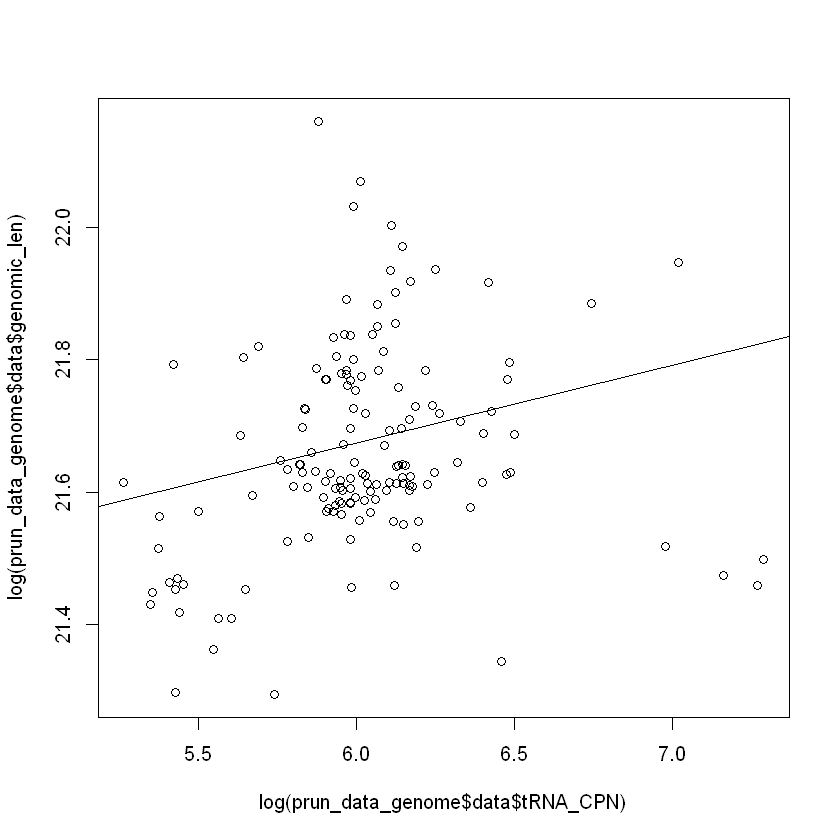

In [9]:
# genome assemblies length VS tRNA copy number

prun_data_genome <- prunDataTree(ddata, ttree, list(x1='tRNA_CPN', x2='genomic_len'))
model.pgls.genome <- phylolm(log(genomic_len) ~  log(tRNA_CPN), 
                          data = prun_data_genome$data, 
                          phy =  prun_data_genome$phy, 
                          model = "kappa")

cat('n =',nrow(prun_data_genome$data),'\n')
summary(model.pgls.genome)

plot(log(prun_data_genome$data$genomic_len) ~  log(prun_data_genome$data$tRNA_CPN))
abline(model.pgls.genome)

## adult / birth body mass vs tRNA copy

In [10]:
prun_data_mass       <- prunDataTree(ddata, ttree, list(x1='tRNA_CPN', x2='mass'))
prun_data_birth_mass <- prunDataTree(ddata, ttree, list(x1='tRNA_CPN', x2='birth_mass'))

pgls.mass.tRNA <- phylolm(log(mass) ~  log(tRNA_CPN), 
                          data = prun_data_mass$data, 
                          phy =  prun_data_mass$phy, 
                          model = "kappa")

pgls.mass.genome <- phylolm(log(mass) ~  log(genomic_len), 
                          data = prun_data_mass$data, 
                          phy =  prun_data_mass$phy, 
                          model = "kappa")

pgls.birth_mass.tRNA <- phylolm(log(birth_mass) ~  log(tRNA_CPN), 
                          data = prun_data_birth_mass$data, 
                          phy =  prun_data_birth_mass$phy, 
                          model = "kappa")

pgls.birth_mass.genome <- phylolm(log(birth_mass) ~  log(genomic_len), 
                          data = prun_data_birth_mass$data, 
                          phy =  prun_data_birth_mass$phy, 
                          model = "kappa")

In [11]:
nrow(prun_data_mass$data)

[1] 148

In [12]:
nrow(prun_data_birth_mass$data)

[1] 138

### adult body mass ~ genome length


Call:
phylolm(formula = log(mass) ~ log(genomic_len), data = prun_data_mass$data, 
    phy = prun_data_mass$phy, model = "kappa")

   AIC logLik 
 589.3 -290.6 

Raw residuals:
   Min     1Q Median     3Q    Max 
-5.998 -2.044  1.826  4.871 12.024 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.6070532
sigma2: 0.3152168 

Coefficients:
                  Estimate    StdErr t.value p.value
(Intercept)      -12.79366  41.61243 -0.3074  0.7589
log(genomic_len)   0.90316   1.91756  0.4710  0.6383

R-squared: 0.001517	Adjusted R-squared: -0.005322 

Note: p-values and R-squared are conditional on kappa=0.6070532.

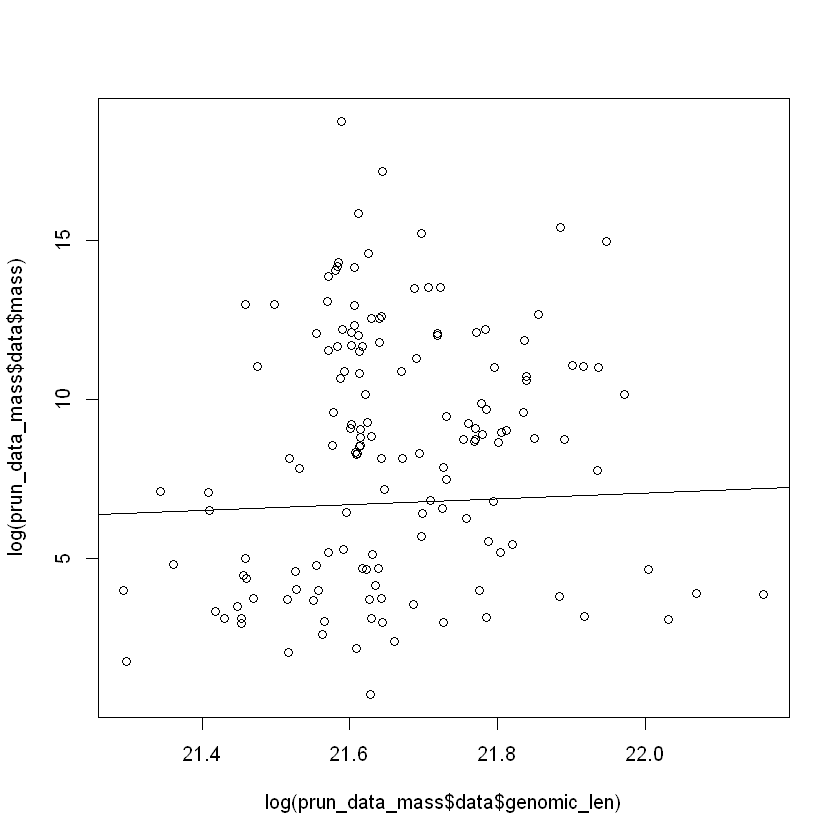

In [13]:
summary(pgls.mass.genome)
plot(log(prun_data_mass$data$mass) ~  log(prun_data_mass$data$genomic_len))
abline(pgls.mass.genome)

### birth body mass ~ genome length


Call:
phylolm(formula = log(birth_mass) ~ log(genomic_len), data = prun_data_birth_mass$data, 
    phy = prun_data_birth_mass$phy, model = "kappa")

   AIC logLik 
 508.7 -250.4 

Raw residuals:
   Min     1Q Median     3Q    Max 
-4.285  1.610  4.729  7.230 14.222 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.586622
sigma2: 0.2496815 

Coefficients:
                 Estimate   StdErr t.value p.value
(Intercept)      -20.0898  38.6442 -0.5199  0.6040
log(genomic_len)   0.9439   1.7794  0.5305  0.5967

R-squared: 0.002065	Adjusted R-squared: -0.005273 

Note: p-values and R-squared are conditional on kappa=0.586622.

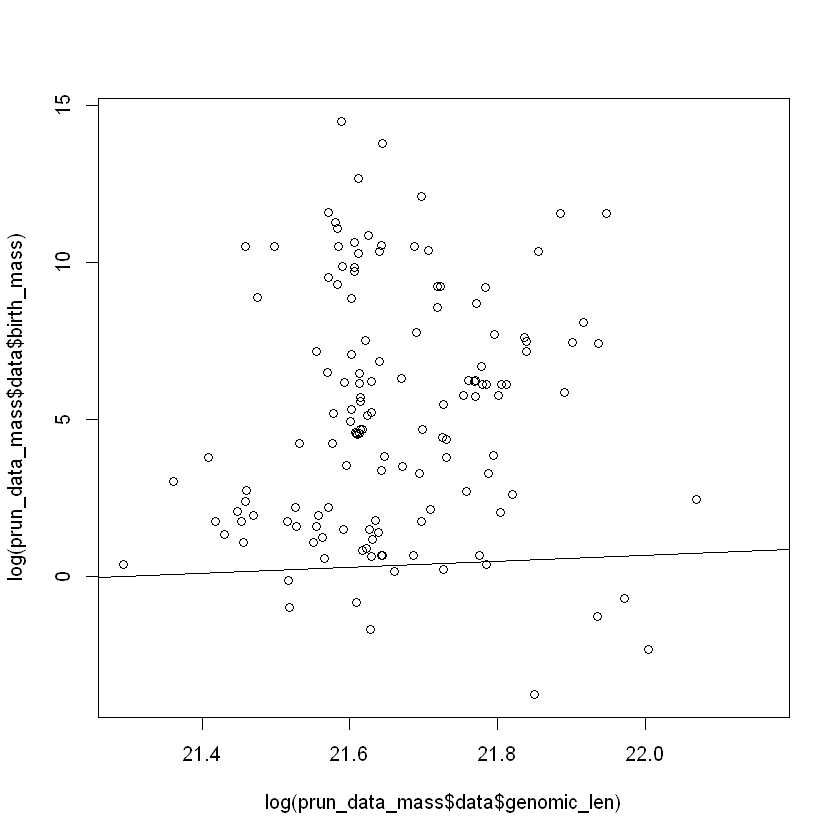

In [14]:
summary(pgls.birth_mass.genome)
plot(log(prun_data_mass$data$birth_mass) ~  log(prun_data_mass$data$genomic_len))
abline(pgls.birth_mass.genome)

### adult body mass ~ tRNA


Call:
phylolm(formula = log(mass) ~ log(tRNA_CPN), data = prun_data_mass$data, 
    phy = prun_data_mass$phy, model = "kappa")

   AIC logLik 
 582.2 -287.1 

Raw residuals:
   Min     1Q Median     3Q    Max 
-5.276 -1.324  2.483  4.782 12.496 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.5643993
sigma2: 0.331305 

Coefficients:
              Estimate   StdErr t.value p.value   
(Intercept)   -5.52129  4.82272 -1.1449 0.25414   
log(tRNA_CPN)  1.95051  0.71583  2.7248 0.00722 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.04839	Adjusted R-squared: 0.04187 

Note: p-values and R-squared are conditional on kappa=0.5643993.

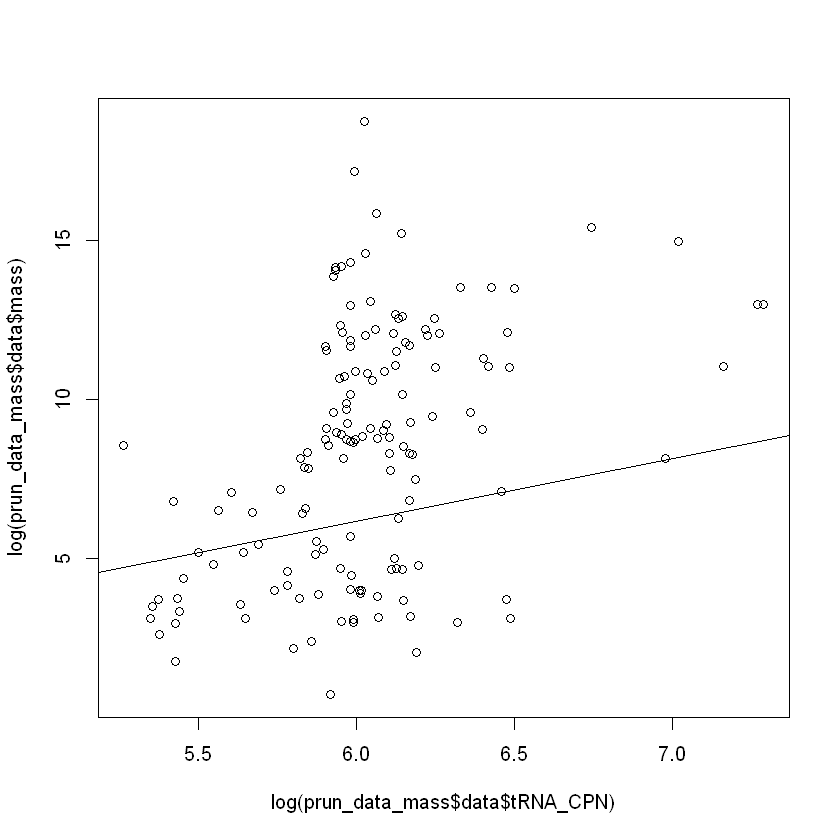

In [15]:
summary(pgls.mass.tRNA)
plot(log(prun_data_mass$data$mass) ~  log(prun_data_mass$data$tRNA_CPN))
abline(pgls.mass.tRNA)

### birth body mass ~ tRNA copys


Call:
phylolm(formula = log(birth_mass) ~ log(tRNA_CPN), data = prun_data_birth_mass$data, 
    phy = prun_data_birth_mass$phy, model = "kappa")

   AIC logLik 
 503.9 -248.0 

Raw residuals:
   Min     1Q Median     3Q    Max 
-3.587  2.522  5.145  7.713 14.730 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.5634105
sigma2: 0.2541465 

Coefficients:
              Estimate   StdErr t.value p.value  
(Intercept)   -8.77923  4.29349 -2.0448 0.04281 *
log(tRNA_CPN)  1.42019  0.62746  2.2634 0.02520 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.0363	Adjusted R-squared: 0.02921 

Note: p-values and R-squared are conditional on kappa=0.5634105.

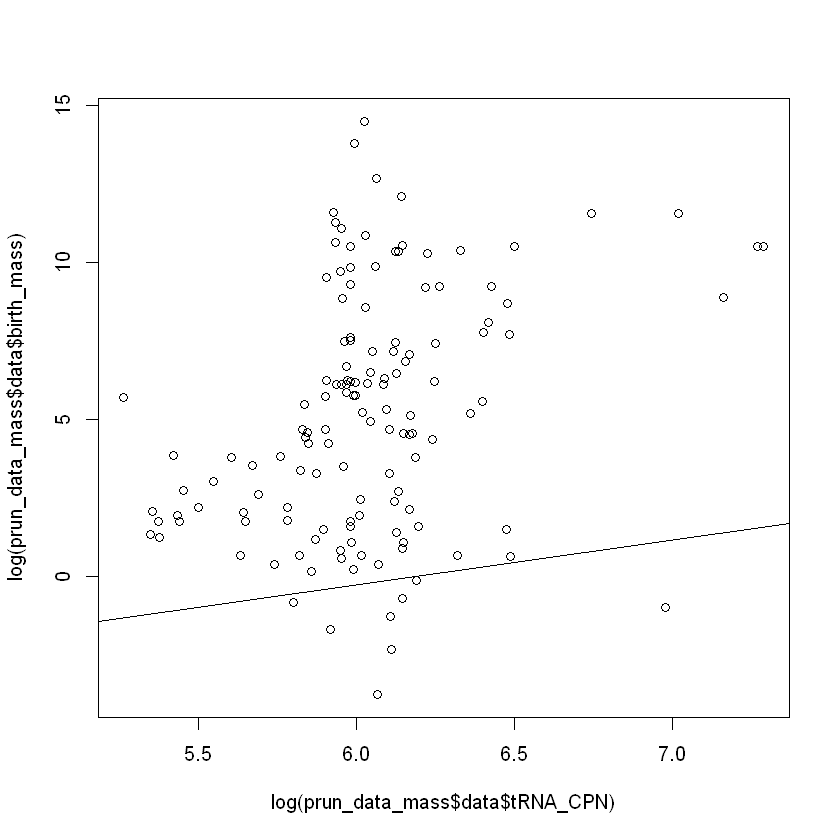

In [16]:
summary(pgls.birth_mass.tRNA)
plot(log(prun_data_mass$data$birth_mass) ~  log(prun_data_mass$data$tRNA_CPN))
abline(pgls.birth_mass.tRNA)

## tRNA copy number VS whole coding sequence length

### Supplement Fig.2

In [17]:
prun_data <- prunDataTree(ddata, 
                          ttree, 
                          list(x1='CDs_len', x2='tRNA_CPN'))
pic_data <- prun_data

cds  <- setNames(log(pic_data$data$CDs_len), rownames(pic_data$data))
trna <- setNames(log(pic_data$data$tRNA_CPN), rownames(pic_data$data))


# PIC
pic.cds <- pic(cds, pic_data$phy)
pic.trna <- pic(trna, pic_data$phy)
print(nrow(prun_data$data))

[1] 150



	Pearson's product-moment correlation

data:  pic.cds and pic.trna
t = 6.6258, df = 147, p-value = 6.106e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3453856 0.5945084
sample estimates:
      cor 
0.4795522 


outlier:	 124


	Pearson's product-moment correlation

data:  pic.cds.new and pic.trna.new
t = 6.3875, df = 146, p-value = 2.122e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3309615 0.5846113
sample estimates:
      cor 
0.4673495 


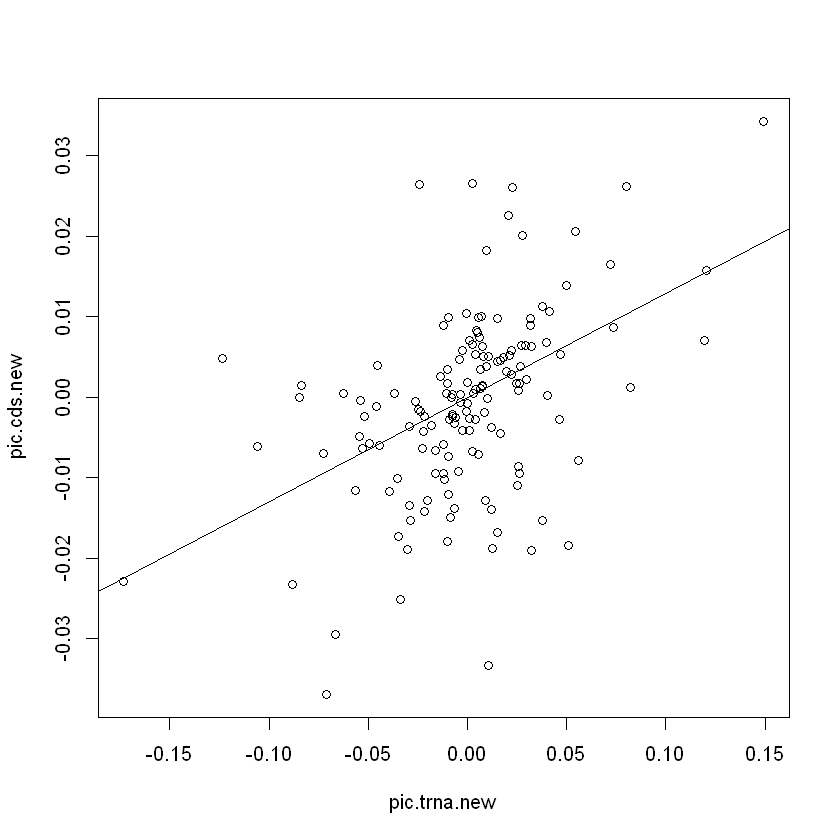

In [18]:
cor.test(pic.cds, pic.trna)
ols.cds.trna <- lm(pic.cds ~ pic.trna-1)
# plot(pic.cds ~ pic.trna)
# abline(ols.cds.trna)

res<- residuals(ols.cds.trna)
res<- res/sqrt(var(res))[1]
out_s <- names(res)[(abs(res)>3)] 
cat('outlier:\t',out_s)


pic.cds.new <- pic.cds[!names(pic.cds) %in% out_s]
pic.trna.new <- pic.trna[!names(pic.trna) %in% out_s]

cor.test(pic.cds.new, pic.trna.new, method='pearson')
ols.cds.trna <- lm(pic.cds.new ~ pic.trna.new-1)

plot(pic.cds.new ~ pic.trna.new)
abline(ols.cds.trna)

# -------------------- delete aquatic mammals --------------------

### becaus their significantly larger average body mass compared to terrestrial mammals

In [19]:
table(ddata$mammalia_class)


    aquatic      flying terrestrial 
         23          14         113 

In [20]:
prun_data_mass_del <- prunDataTree(ddata[ddata$mammalia_class!='aquatic',], ttree, list(x1='tRNA_CPN', x2='mass'))
prun_data_birth_mass_del <- prunDataTree(ddata[ddata$mammalia_class!='aquatic',], ttree, list(x1='tRNA_CPN', x2='birth_mass'))

pgls.am.trna.del <- phylolm(log(mass) ~  log(tRNA_CPN), 
                          data = prun_data_mass_del$data, 
                          phy =  prun_data_mass_del$phy, 
                          model = "kappa")

pgls.am.genome.del <- phylolm(log(mass) ~  log(genomic_len), 
                          data = prun_data_mass_del$data, 
                          phy =  prun_data_mass_del$phy, 
                          model = "kappa")

pgls.bm.trna.del <- phylolm(log(birth_mass) ~  log(tRNA_CPN), 
                          data = prun_data_birth_mass_del$data, 
                          phy =  prun_data_birth_mass_del$phy, 
                          model = "kappa")
pgls.bm.genome.del <- phylolm(log(birth_mass) ~  log(genomic_len), 
                          data = prun_data_birth_mass_del$data, 
                          phy =  prun_data_birth_mass_del$phy, 
                          model = "kappa")

In [21]:
nrow(prun_data_mass_del$data)

[1] 125

In [22]:
nrow(prun_data_birth_mass_del$data)

[1] 117


Call:
phylolm(formula = log(mass) ~ log(tRNA_CPN), data = prun_data_mass_del$data, 
    phy = prun_data_mass_del$phy, model = "kappa")

   AIC logLik 
 480.8 -236.4 

Raw residuals:
   Min     1Q Median     3Q    Max 
-5.252 -1.655  1.918  3.891  8.369 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.7603499
sigma2: 0.1775109 

Coefficients:
              Estimate   StdErr t.value  p.value   
(Intercept)   -6.11853  4.68197 -1.3068 0.193709   
log(tRNA_CPN)  2.04737  0.67408  3.0373 0.002915 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.06977	Adjusted R-squared: 0.06221 

Note: p-values and R-squared are conditional on kappa=0.7603499.

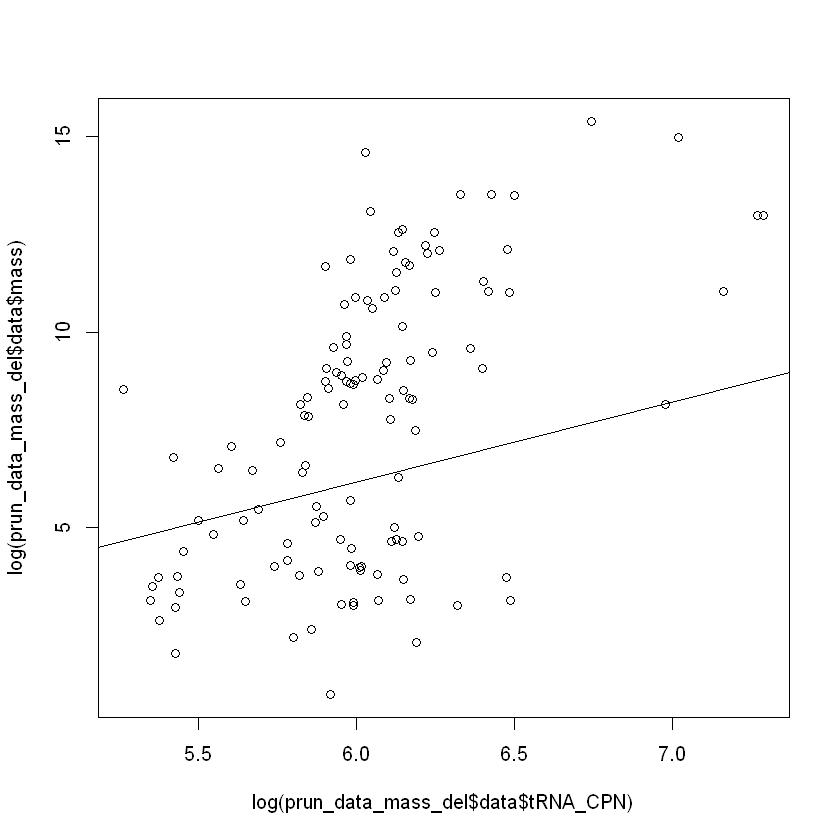

In [23]:
summary(pgls.am.trna.del)
plot(log(prun_data_mass_del$data$mass) ~  log(prun_data_mass_del$data$tRNA_CPN))
abline(pgls.am.trna.del)


Call:
phylolm(formula = log(birth_mass) ~ log(tRNA_CPN), data = prun_data_birth_mass_del$data, 
    phy = prun_data_birth_mass_del$phy, model = "kappa")

   AIC logLik 
 406.2 -199.1 

Raw residuals:
   Min     1Q Median     3Q    Max 
-3.552  2.256  4.749  6.744 11.141 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.6747256
sigma2: 0.1520512 

Coefficients:
               Estimate    StdErr t.value   p.value    
(Intercept)   -12.00139   3.90900 -3.0702 0.0026695 ** 
log(tRNA_CPN)   1.94570   0.56716  3.4306 0.0008372 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.09284	Adjusted R-squared: 0.08495 

Note: p-values and R-squared are conditional on kappa=0.6747256.

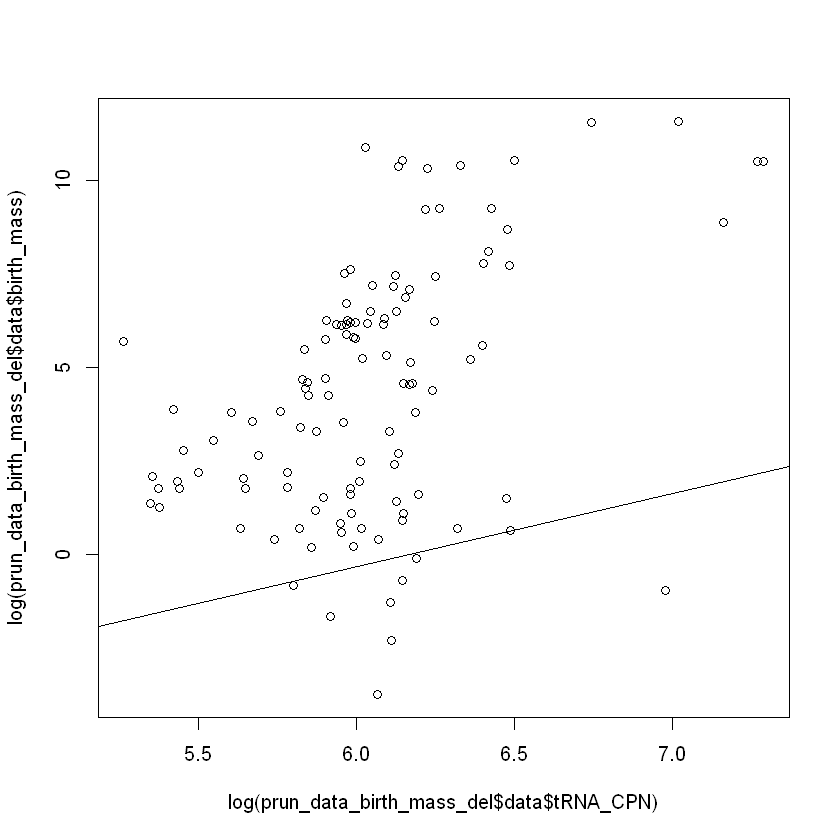

In [23]:
summary(pgls.bm.trna.del)
plot(log(prun_data_birth_mass_del$data$birth_mass) ~  log(prun_data_birth_mass_del$data$tRNA_CPN))
abline(pgls.bm.trna.del)


Call:
phylolm(formula = log(mass) ~ log(genomic_len), data = prun_data_mass_del$data, 
    phy = prun_data_mass_del$phy, model = "kappa")

   AIC logLik 
 488.7 -240.4 

Raw residuals:
   Min     1Q Median     3Q    Max 
-6.085 -2.658  1.329  3.810  8.463 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.9033441
sigma2: 0.1333315 

Coefficients:
                 Estimate   StdErr t.value p.value
(Intercept)      -1.13278 42.33423 -0.0268  0.9787
log(genomic_len)  0.36801  1.94498  0.1892  0.8502

R-squared: 0.000291	Adjusted R-squared: -0.007837 

Note: p-values and R-squared are conditional on kappa=0.9033441.

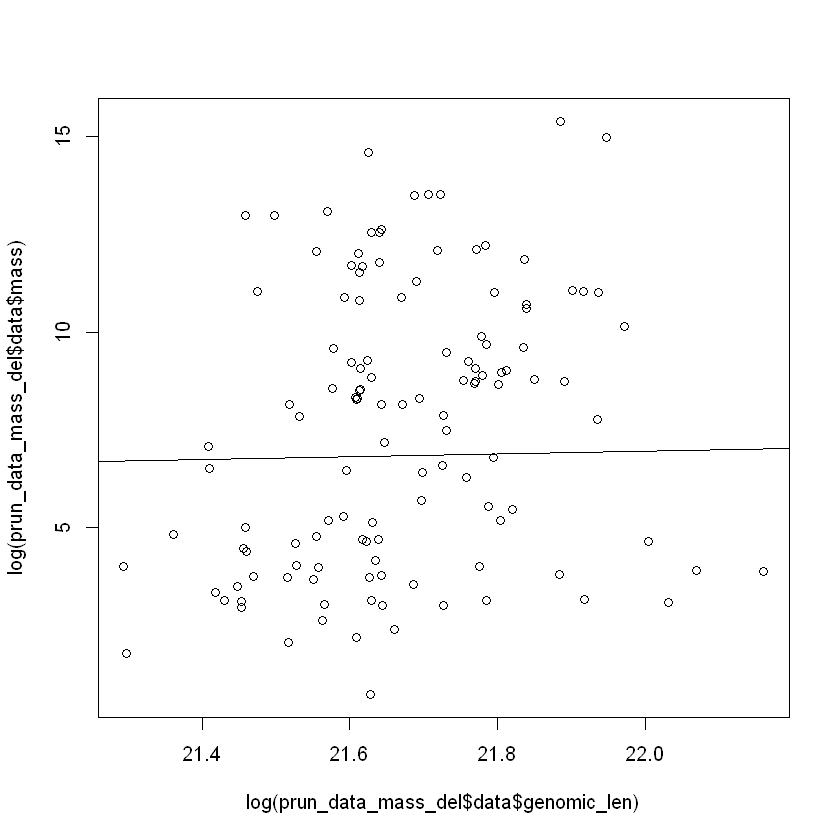

In [24]:
summary(pgls.am.genome.del)
plot(log(prun_data_mass_del$data$mass) ~  log(prun_data_mass_del$data$genomic_len))
abline(pgls.am.genome.del)


Call:
phylolm(formula = log(birth_mass) ~ log(genomic_len), data = prun_data_birth_mass_del$data, 
    phy = prun_data_birth_mass_del$phy, model = "kappa")

   AIC logLik 
 416.1 -204.0 

Raw residuals:
   Min     1Q Median     3Q    Max 
-4.499  1.246  3.858  5.796 10.767 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
kappa : 0.77073
sigma2: 0.1314805 

Coefficients:
                 Estimate   StdErr t.value p.value
(Intercept)      -27.7682  37.7630 -0.7353  0.4636
log(genomic_len)   1.3051   1.7373  0.7512  0.4540

R-squared: 0.004883	Adjusted R-squared: -0.00377 

Note: p-values and R-squared are conditional on kappa=0.77073.

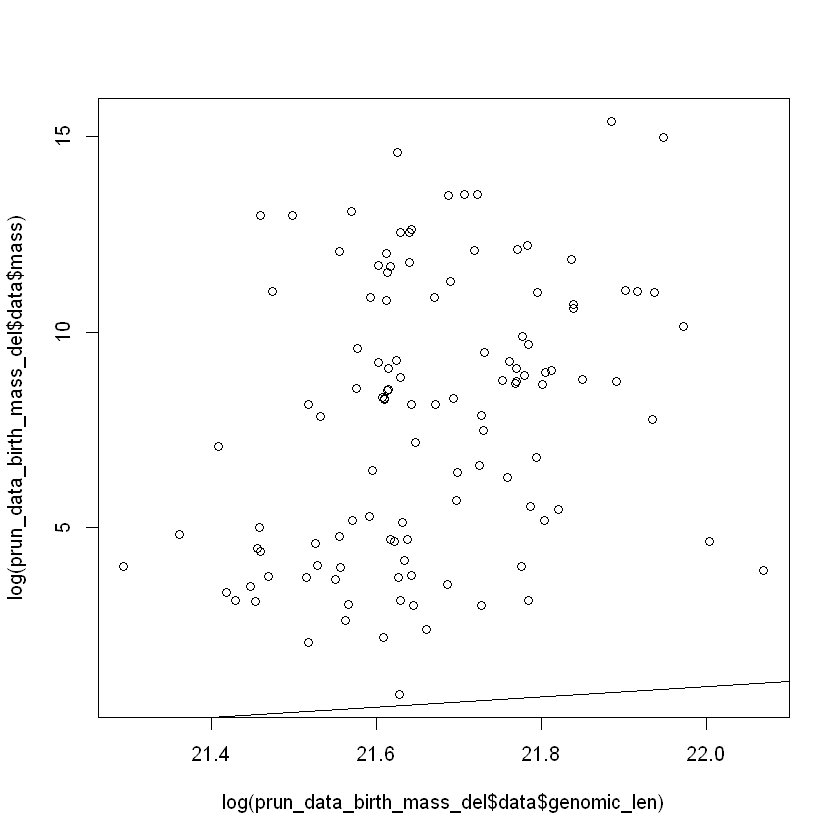

In [25]:
summary(pgls.bm.genome.del)
plot(log(prun_data_birth_mass_del$data$mass) ~  log(prun_data_birth_mass_del$data$genomic_len))
abline(pgls.bm.genome.del)

##   tRNA vs generation time (GT)

[1] "-------------------------------"
correlation:	 -tRNA VS GT- Species evolutionary relationships have not been removed.



	Pearson's product-moment correlation

data:  tRNA and gt
t = 2.4195, df = 114, p-value = 0.01712
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04031333 0.38770059
sample estimates:
      cor 
0.2210056 


correlation:	 -tRNA VS GTres- Species evolutionary relationships have not been removed.



	Pearson's product-moment correlation

data:  tRNA and gtres
t = -2.1768, df = 114, p-value = 0.03156
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.36865432 -0.01810709
sample estimates:
       cor 
-0.1997642 


[1] "-------------------------------"
[1] "PICs correlation"
PICs correlation:	 -tRNA VS GT- 



	Pearson's product-moment correlation

data:  pic.tRNA and pic.gt
t = 1.8194, df = 113, p-value = 0.0715
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01487189  0.34126660
sample estimates:
     cor 
0.168698 


PICs correlation:	 -tRNA VS GTres- 



	Pearson's product-moment correlation

data:  pic.tRNA and pic.gtres
t = 0.67138, df = 113, p-value = 0.5033
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1214797  0.2433348
sample estimates:
      cor 
0.0630329 


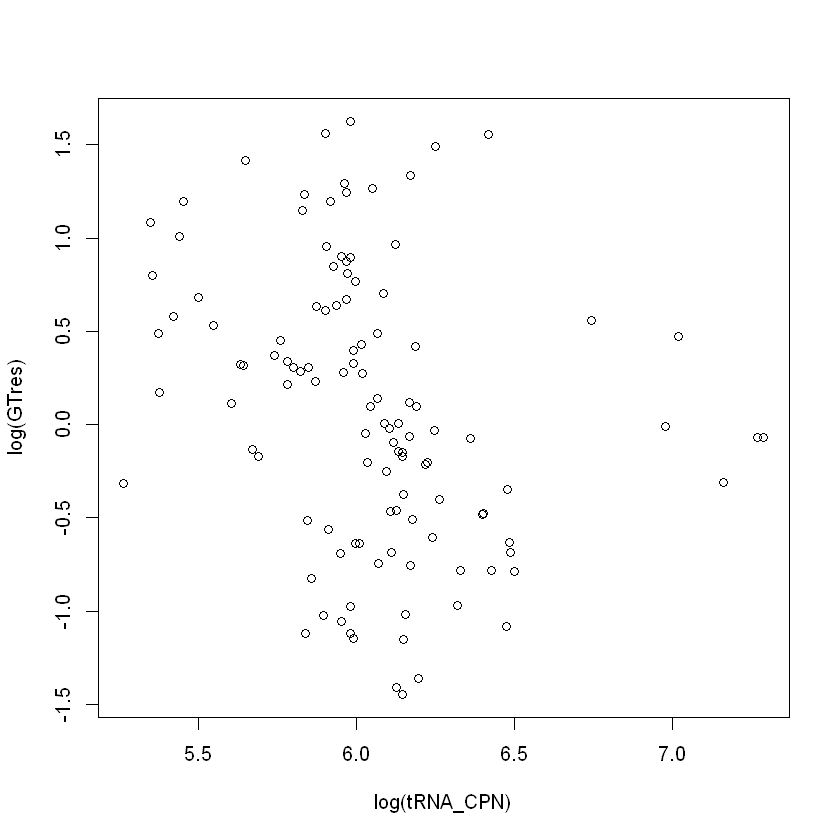

In [25]:
prun_data_gt <- prunDataTree(ddata[ddata$mammalia_class!='aquatic',], ttree, list(x1='tRNA_CPN', x2='GTres'))
pic_data <- prun_data_gt

tRNA <- setNames(pic_data$data$tRNA_CPN, rownames(pic_data$data))
gt   <- setNames(pic_data$data$GT, rownames(pic_data$data))
gtres <- setNames(pic_data$data$GTres, rownames(pic_data$data))

# pearson
print('-------------------------------')
cat('correlation:\t', '-tRNA VS GT-', 'Species evolutionary relationships have not been removed.\n')
cor.test(tRNA, gt)
cat('correlation:\t', '-tRNA VS GTres-', 'Species evolutionary relationships have not been removed.\n')
cor.test(tRNA, gtres)

pic.tRNA <- pic(tRNA, pic_data$phy)
pic.gt <- pic(gt, pic_data$phy)
pic.gtres <- pic(gtres, pic_data$phy)

# PICs pearson
print('-------------------------------')
print('PICs correlation')
cat('PICs correlation:\t', '-tRNA VS GT-', '\n')
cor.test(pic.tRNA, pic.gt)
cat('PICs correlation:\t', '-tRNA VS GTres-', '\n')
cor.test(pic.tRNA, pic.gtres)

plot(log(GTres) ~ log(tRNA_CPN),data = pic_data$data)

## residual of tRNA corrected for ABM VS residuals of GT corrected for ABM (GTres)

outliers:	 Camelus_dromedarius Vicugna_pacos Camelus_ferus Tachyglossus_aculeatus 



Call:
lm(formula = log(tRNA_CPN) ~ log(mass), data = data_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7713 -0.1527 -0.0253  0.1698  0.6996 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.645528   0.054655 103.295  < 2e-16 ***
log(mass)   0.045450   0.006622   6.863 3.24e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2549 on 119 degrees of freedom
Multiple R-squared:  0.2836,	Adjusted R-squared:  0.2776 
F-statistic: 47.11 on 1 and 119 DF,  p-value: 3.24e-10


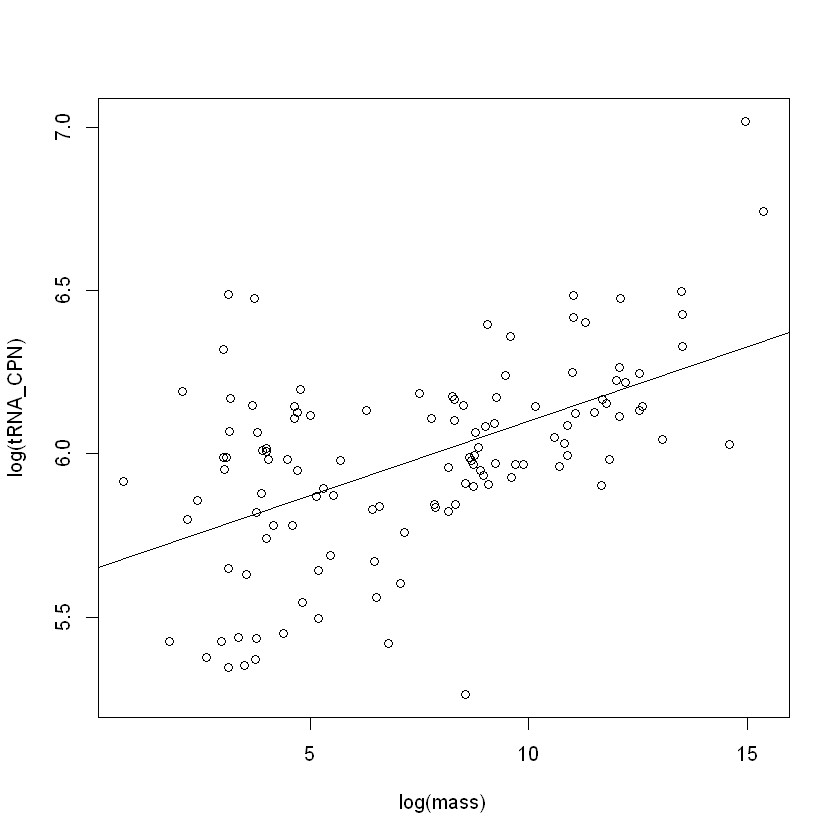

In [26]:
data_1 <- prunDataTree(ddata[ddata$mammalia_class!='aquatic',], ttree, list(x1='tRNA_CPN', x2='mass'))

lm.tRNA.mass <- lm(tRNA_CPN ~ mass, data_1$data)

res<- residuals(lm.tRNA.mass)
res<- res/sqrt(var(res))[1]
out_s <- names(res)[(abs(res)>3)] # outlier 
cat('outliers:\t', out_s, '\n')

data_2 <- data_1$data[!data_1$data$phy_label %in% out_s,]
lm.tRNA.mass.2 <- lm(log(tRNA_CPN) ~ log(mass), data_2)
summary(lm.tRNA.mass.2)

plot(log(tRNA_CPN) ~ log(mass), data=data_2)
abline(lm.tRNA.mass.2)

# residuals
tRNA_hat <- predict(lm.tRNA.mass.2)
tRNA_y <- data_2$tRNA_CPN
data_2['tRNAres'] = tRNA_y / tRNA_hat

outliers:	 53 56 



	Pearson's product-moment correlation

data:  pic.tRNAres[!names(pic.tRNAres) %in% out_s] and pic.gtres[!names(pic.gtres) %in% out_s]
t = -0.36726, df = 107, p-value = 0.7142
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2221014  0.1536451
sample estimates:
        cor 
-0.03548204 


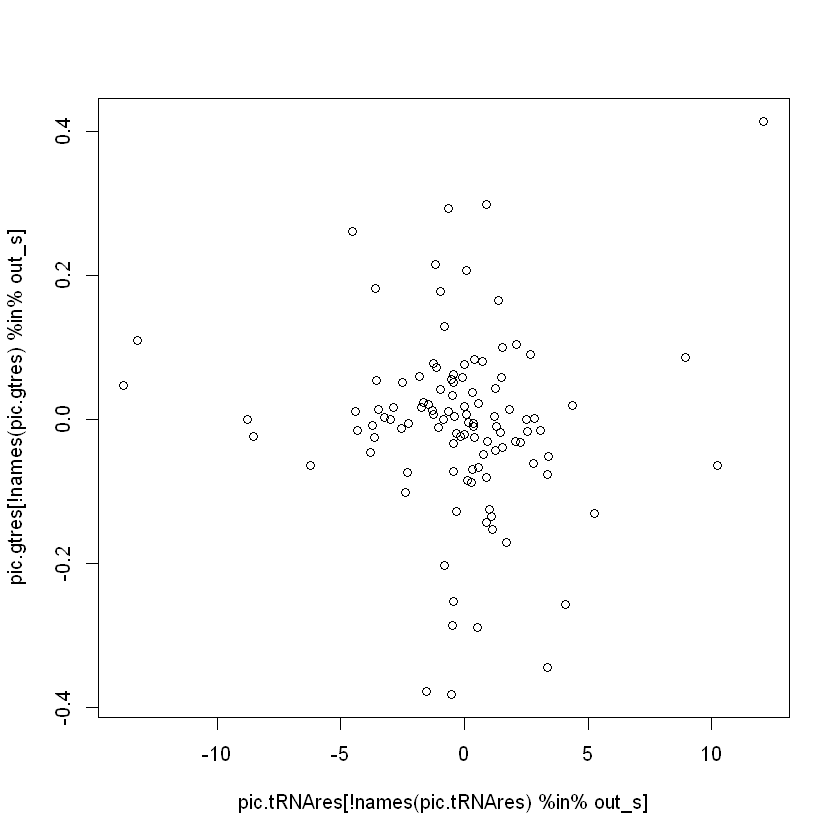

In [28]:
pic_data <- prunDataTree(data_2, ttree, list(x1='tRNAres', x2='GTres'))

tRNAres <- setNames(pic_data$data$tRNAres, rownames(pic_data$data))
gtres <- setNames(pic_data$data$GTres, rownames(pic_data$data))

pic.tRNAres <- pic(tRNAres, pic_data$phy)
pic.gtres <- pic(gtres, pic_data$phy)

lm.res <- lm(pic.gtres ~ pic.tRNAres-1)
res<- residuals(lm.res)
res<- res/sqrt(var(res))[1]
out_s <- names(res)[(abs(res)>3)] # outlier # 'Tachyglossus_aculeatus'
cat('outliers:\t', out_s, '\n')
cor.test(pic.tRNAres[!names(pic.tRNAres) %in% out_s], pic.gtres[!names(pic.gtres) %in% out_s])
plot(pic.tRNAres[!names(pic.tRNAres) %in% out_s], pic.gtres[!names(pic.gtres) %in% out_s])

# cor.test(pic.tRNAres, pic.gtres)


	Pearson's product-moment correlation

data:  log(pic_data$data$GTres) and log(pic_data$data$tRNAres)
t = -3.7013, df = 110, p-value = 0.0003369
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4881994 -0.1569251
sample estimates:
       cor 
-0.3327905 


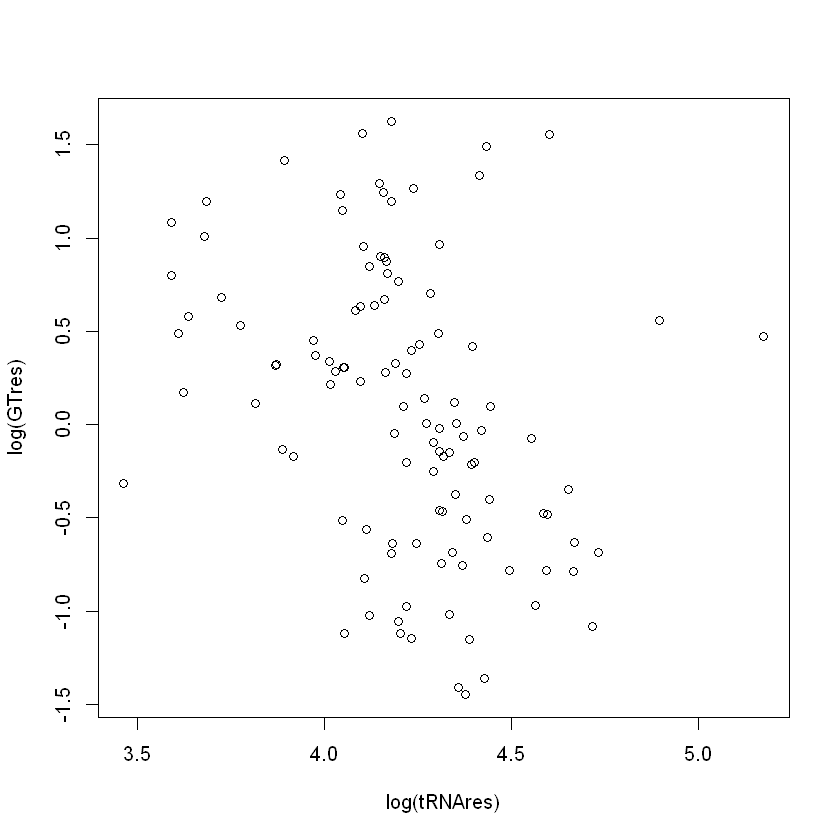

In [29]:
plot(log(GTres) ~ log(tRNAres),data = pic_data$data)
cor.test(log(pic_data$data$GTres), log(pic_data$data$tRNAres))